# 1. Importing Data from the CSV files

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

carprices_df = pd.read_csv('CarPrice_Assignment.csv')
carprices_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Creating a new column `CompanyName` by splitting `carname` column

In [3]:
carprices_df['CompanyName'] = (carprices_df['CarName'].str.split(n=1, expand=True)[0]).str.lower()

# Data Analysis - Visualization

#### Some of the car company names had spelling mistakes. Rectifying the same with below command.

In [4]:
carprices_df['CompanyName'] = carprices_df['CompanyName'].str.replace('maxda', 'mazda')
carprices_df['CompanyName'] = carprices_df['CompanyName'].str.replace('porcshce', 'porsche')
carprices_df['CompanyName'] = carprices_df['CompanyName'].str.replace('toyouta', 'toyota')
carprices_df['CompanyName'] = carprices_df['CompanyName'].str.replace('vokswagen', 'volkswagen')
carprices_df['CompanyName'] = carprices_df['CompanyName'].str.replace('vw', 'volkswagen')

#### Checking the values of the numeric fields and trying to find its variation.

In [109]:
pd.DataFrame(carprices_df[['price', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]).describe()

,price,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,13276.710571,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,7988.852332,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,5118.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,7788.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,10295.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,16503.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,45400.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In the above data we can see that the **minimum price** of the car is 5118 and **maximum price** is 45,400/-.
It has a **mean** of 13276.71 but the **standard deviation** is too high at 7988.85 USD and the value at 50% quartile (**10295.00**)is also not close to the mean. Which means that the price of the car will fluctuate between (13276 - 7989) and (13276 + 7989) i.e. (5287 and 21265) which is too high.
Therefore its important to see the Median, and also check how the cars are priced. Hence will use Histogram to see that.

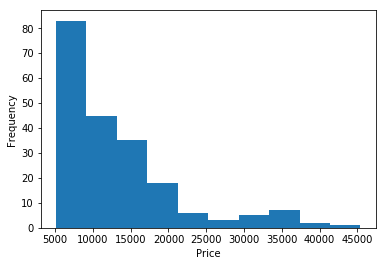

In [4]:
plt.hist(carprices_df['price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

From the histogram we can see that 141 cars out of 205 (**i.e. 68.78%**) are priced at or below 15K USD and very few cars (**i.e. 64**) are above 15K USD.

<font color="red">**Therefore, by looking at this data it seems that American car market is price sensitive, and they prefer lower priced cars.**</font>

#### To check which company is manufacturing cars below and above 15K USD, I'll plot the company name against the price.

***Please note:*** *The data is ordered as per the price range so that we can see the Price distinction clearly.*

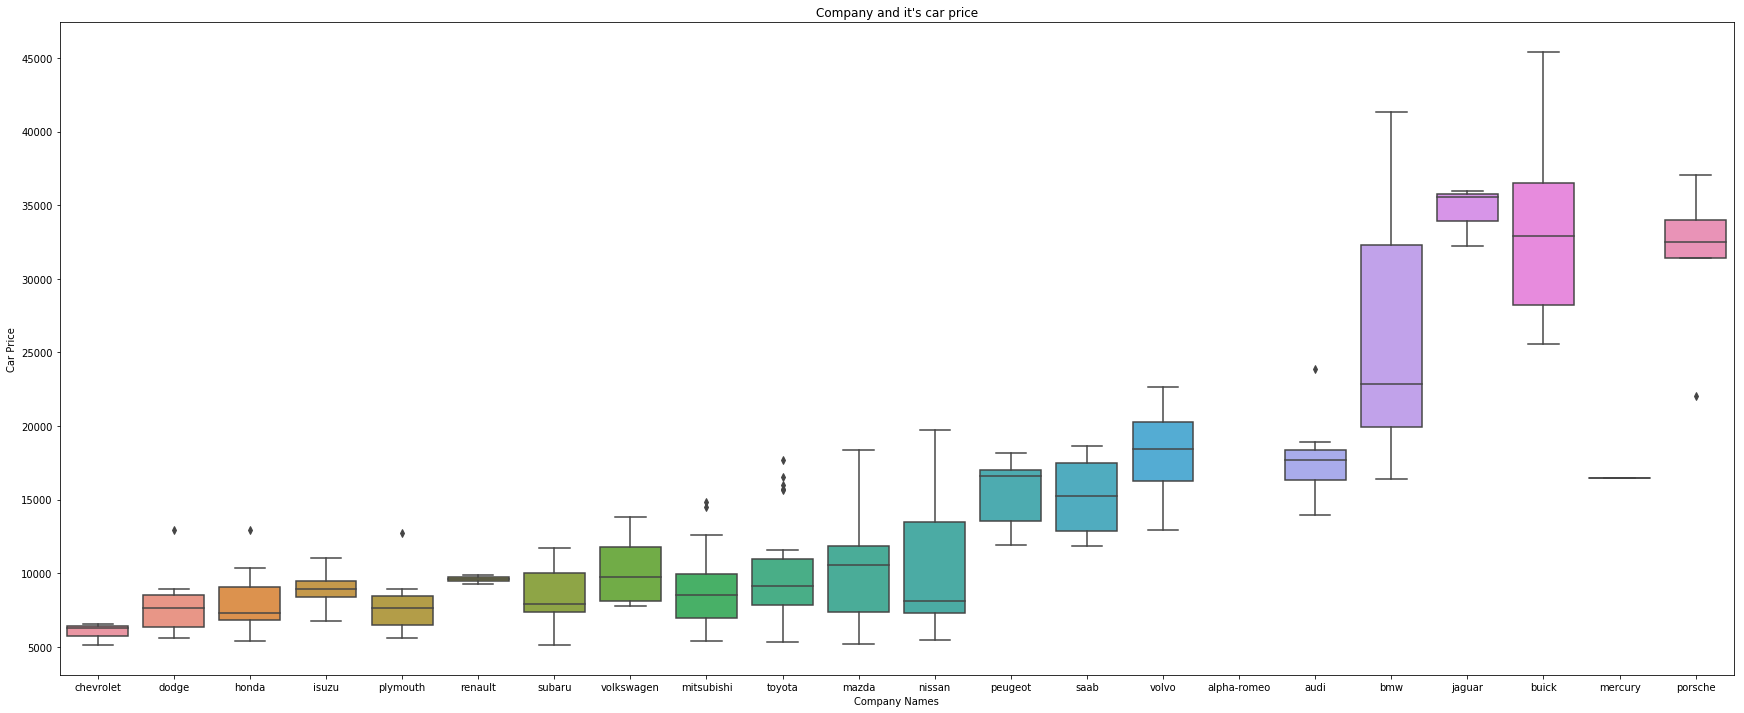

In [5]:
plt.figure(figsize=(30, 12))
plt.subplot(111)
plt.title('Company and it\'s car price')
sns.boxplot(x = 'CompanyName', y = 'price', data = carprices_df, order=['chevrolet', 'dodge', 'honda', 'isuzu', 'plymouth', 'renault', 'subaru', 'volkswagen', 'mitsubishi', 'toyota', 'mazda', 'nissan', 'peugeot', 'saab', 'volvo', 'alpha-romeo', 'audi', 'bmw', 'jaguar', 'buick', 'mercury', 'porsche']).set(xlabel="Company Names", ylabel="Car Price")
plt.show()

From the above plot we can clearly see that the car market is divided into 2 categories of cars.
<br><font color="blue">
1. Cars below 12.5K USD, and 
2. Cars above 12.5K USD
</font>

Therefore we'll need to find out which variables are making a car cheaper or expensive than 12.5K USD. 

# Checking if other categorical variables are having any effect on price

To check that, I'll place each categorical variable in a Box Plots (***which shows the high, low, and median price***) and a Bar plot (***which shows the number of cars that fall in that category***).

I'll be checking the below mentioned categorical variables
1. Fuel System
2. Fuel Type
3. Aspiration
4. Door Number
5. Car Body
6. Drive Wheel
7. Engine Location
8. Engine Type, and
9. Cylinder Number

### Therefore from the above analysis of the categorical variables we can conclude than
### 1. 

# 2. Visualizing the data

#### Creating pairplot to see the relationshilp between different variables

In [ ]:
#sns.pairplot(carprices_df, x_vars=['wheelbase', 'carlength', 'carwidth'], y_vars='price',size=4, aspect=1, kind='scatter')
#sns.pairplot(carprices_df, x_vars=['curbweight', 'enginesize', 'boreratio'], y_vars='price',size=4, aspect=1, kind='scatter')
#sns.pairplot(carprices_df, x_vars=['horsepower', 'citympg', 'highwaympg'], y_vars='price',size=4, aspect=1, kind='scatter')

sns.pairplot(carprices_df)
plt.show()

#### Creating heatmap to see the relationshilp between different variables and their coffecients

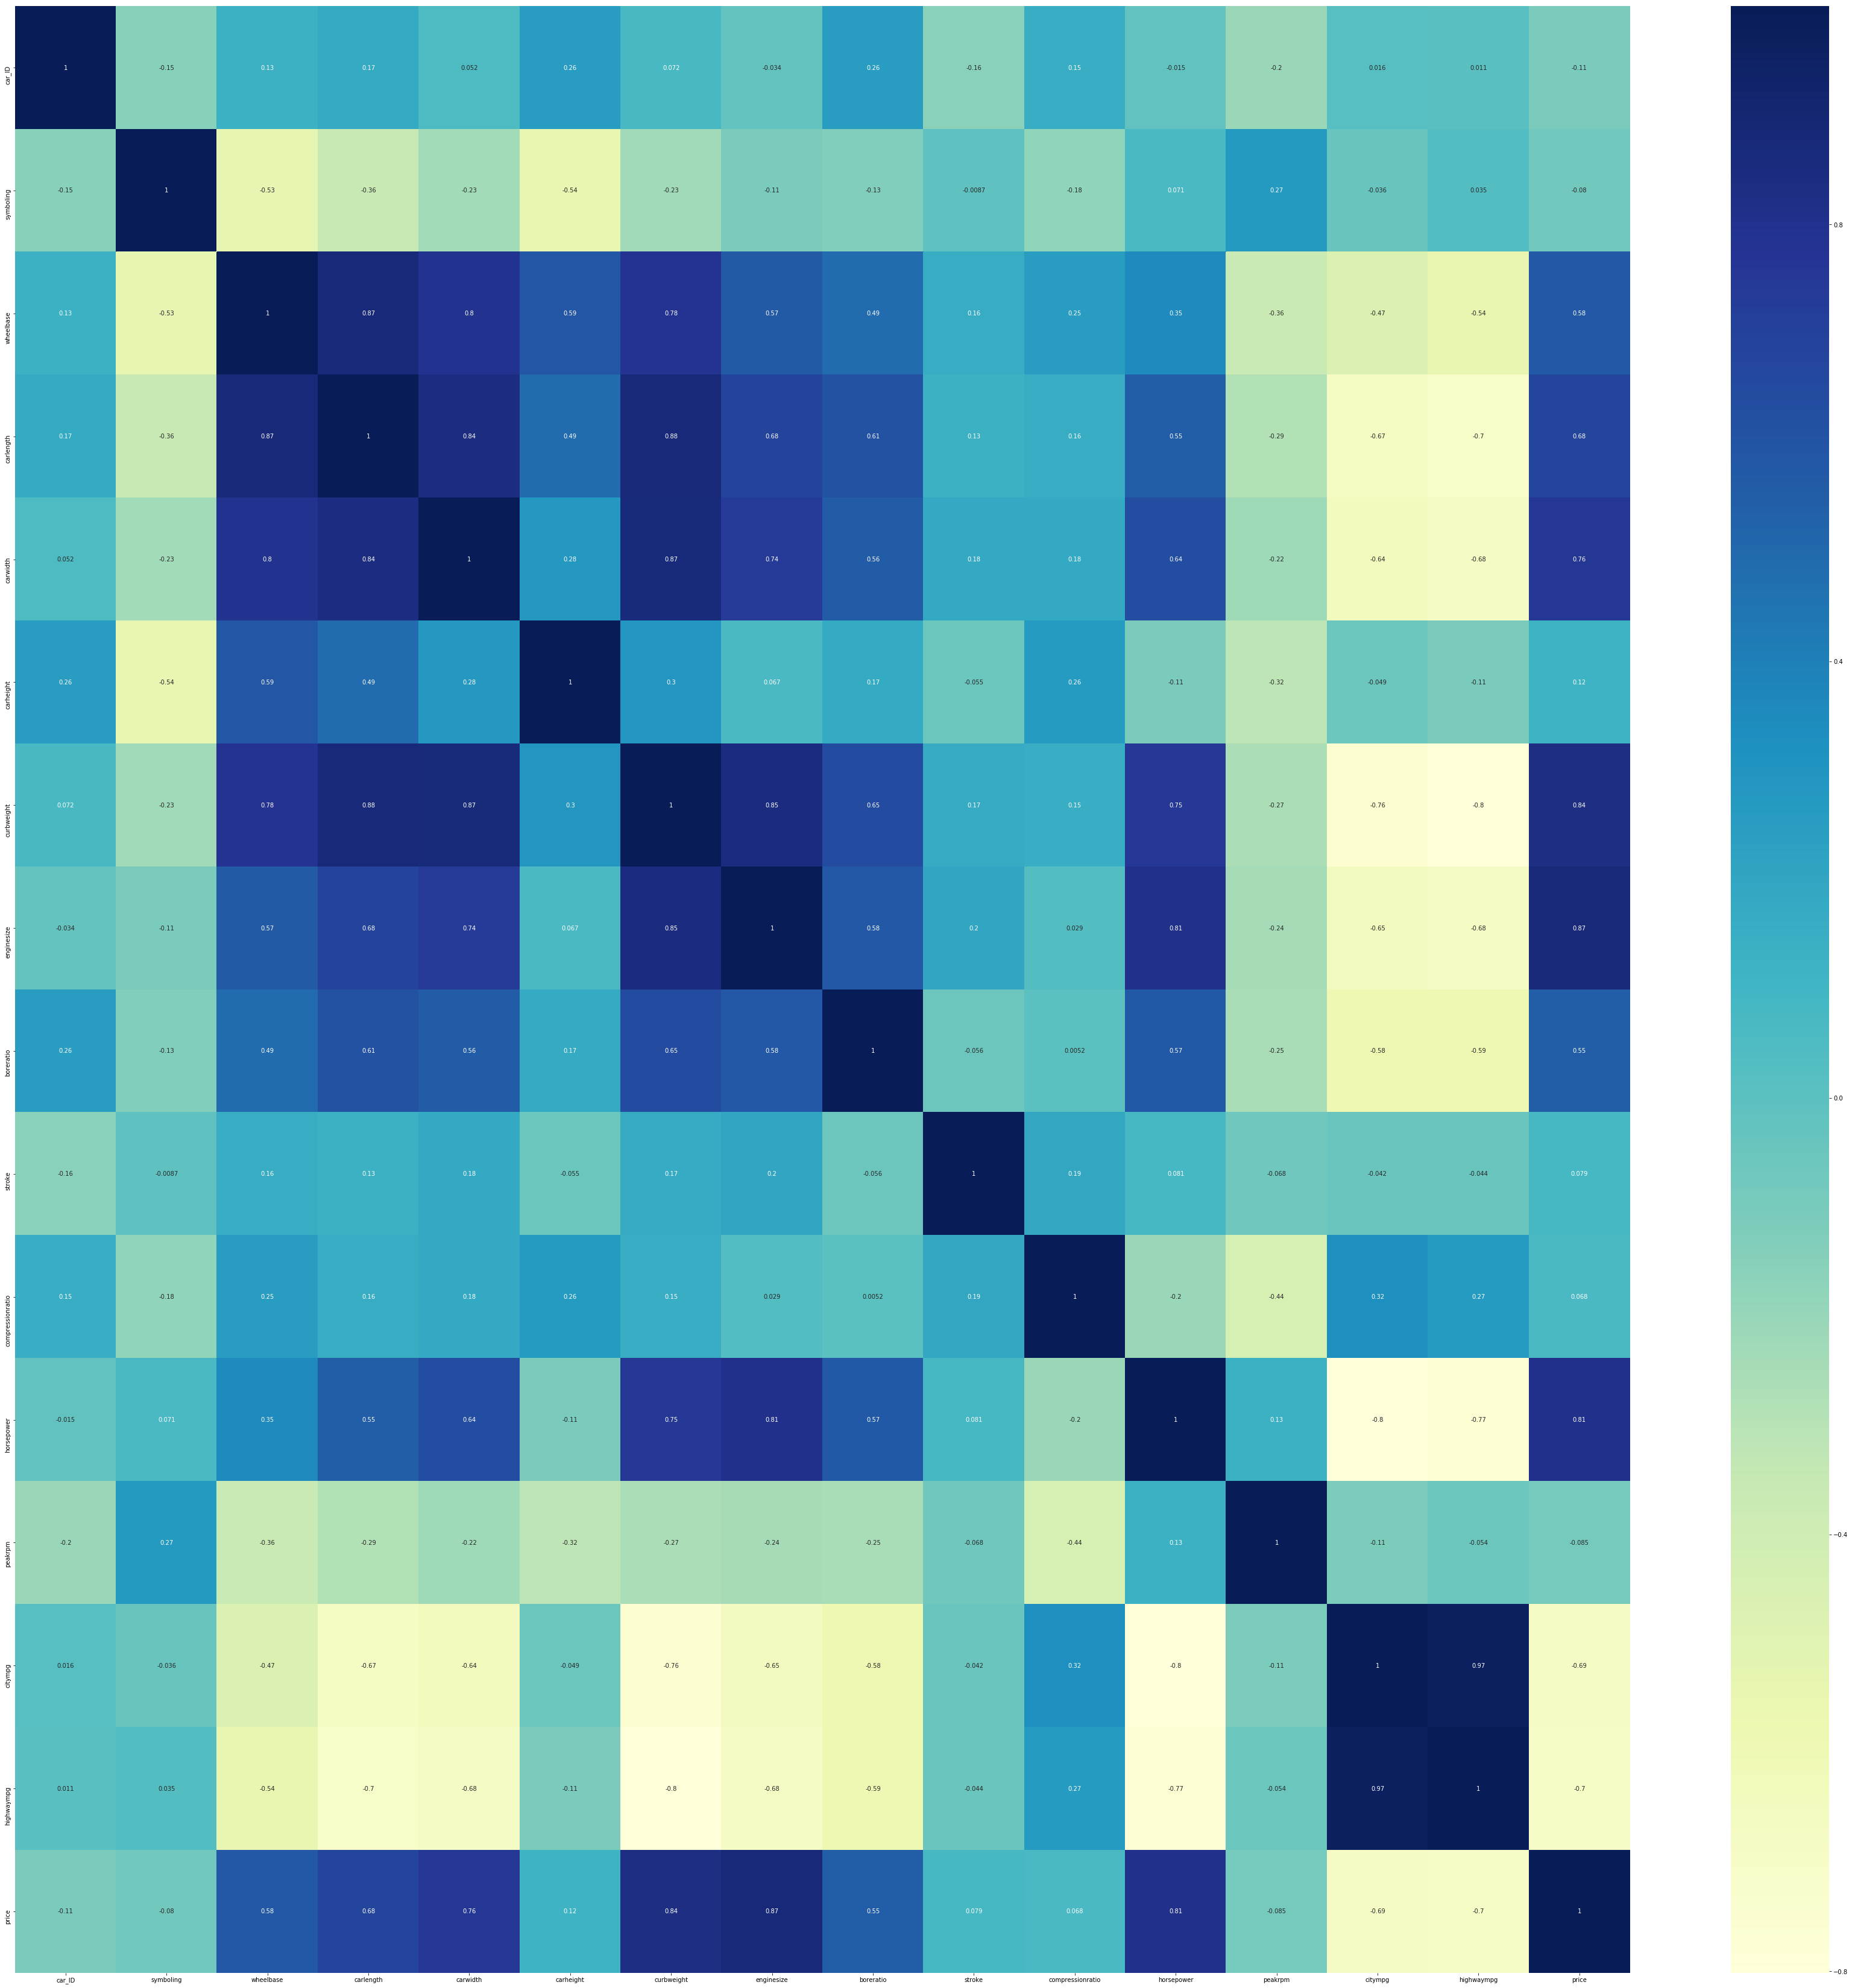

In [5]:
fig = plt.figure(figsize=(60,60))
sns.heatmap(carprices_df.corr(), cmap="YlGnBu", annot = True)
plt.show()
fig.savefig("correlation-bw-fields.png")

# Analysing the categorical variable

#### From the below plot we can make out that the price of Jaguar, Buick, and Porche models are significantly higher than their competitors. 

#### From the below plot we can see that Sedan, and Hardtop are the most costly models, and Hatchback of Porsche are costlier than hatchback of its competitors.

In [ ]:
plt.figure(figsize=(30, 12))
plt.subplot(111)
plt.title('Company and it\'s car price')
sns.boxplot(x = 'CompanyName', y = 'price', hue = 'carbody', data = carprices_df).set(xlabel="Company Names", ylabel="Car Price")
plt.show()

In [ ]:
plt.figure(figsize=(30, 12))
plt.subplot(111)
plt.title('Company and it\'s car price')
sns.boxplot(x = 'CompanyName', y = 'price', hue = 'cylindernumber', data = carprices_df).set(xlabel="Company Names", ylabel="Car Price")
plt.show()

#### From the below plots we can see that Fuel system, Aspiration, Number of doors, and Car body do not have an significant relationship with the price of the car.
#### But, the variables Drive wheel, and Engine location have a significant relationship with price of the car and should be considered in out model.

In [ ]:
plt.figure(figsize=(20, 12))
df = carprices_df['CompanyName'].value_counts()
sns.barplot(df.index, df.values)
plt.show()

# 3. Data Cleaning

In [ ]:
carprices_df.info()
carprices_df.loc[carprices_df['CompanyName']=='mercury']
carprices_df.loc[carprices_df['CompanyName']=='chevrolet']
carprices_df['fuelsystem'].value_counts()

In [8]:
# creating 2 dataframes for cars with price <= 12.5K USD and price > 12.5K USD
carprice_lt125_usd = carprices_df.loc[(carprices_df['price'] <= 12500)]

# creating 2 dataframes for cars with price <= 12.5K USD and price > 12.5K USD
carprice_gt125_usd = carprices_df.loc[(carprices_df['price'] > 12500)]

# Analysing categorical variables

## 1. Fuel System

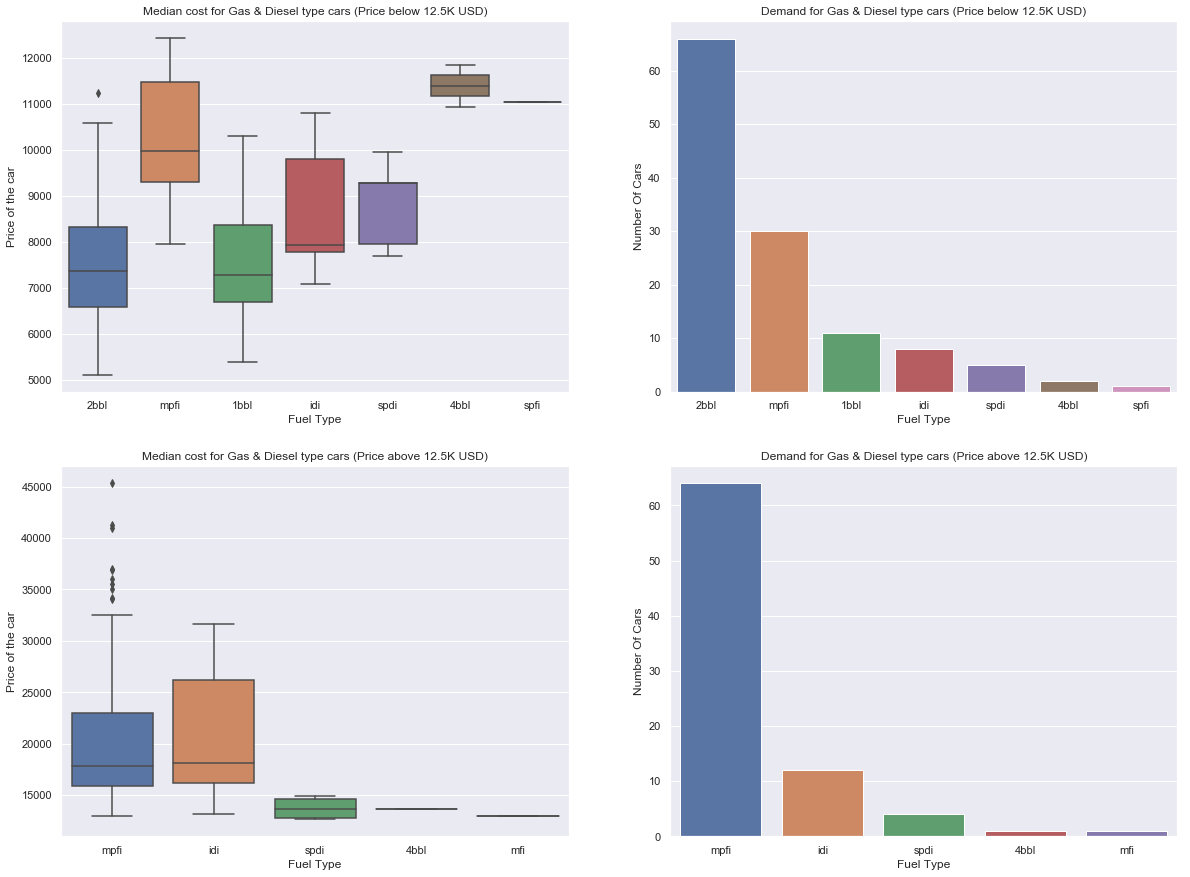

In [211]:
# Plots for Fuel System

plt.figure(figsize=(20, 15))

#plot for cars below 12.5K USD
plt.subplot(221)
plt.title('Median cost for Gas & Diesel type cars (Price below 12.5K USD)')
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice_lt125_usd, order=['2bbl', 'mpfi', '1bbl', 'idi', 'spdi', '4bbl', 'spfi']).set(xlabel="Fuel Type", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Gas & Diesel type cars (Price below 12.5K USD)')
df = carprice_lt125_usd['fuelsystem'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

#plot for cars above 12.5K USD
plt.subplot(223)
plt.title('Median cost for Gas & Diesel type cars (Price above 12.5K USD)')
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice_gt125_usd, order=['mpfi', 'idi', 'spdi', '4bbl', 'mfi']).set(xlabel="Fuel Type", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Gas & Diesel type cars (Price above 12.5K USD)')
df = carprice_gt125_usd['fuelsystem'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

plt.show()

### Analysis of Fuel System variable

Here we can see that the price of the cars of both the category (above and below 12.5K USD) have a significant relationship with the Fuel System (or Fuel Mixing System) variable.

But for cars below 12.5K USD price is related with **2bbl** and for cars above 12.5K USD it is related with **mpfi**.

Since there are 2 types of Fuel Mixing systems, will create 2 dummy variables variables as below;
1. **Carburetor_FS** (will combine it for 1bbl, 2bbl, and 4bbl type of Fuel System)
2. **Injection_FS** (will combine it for mpfi, spfi, idi, and spdi type of Fuel System)

<br><br>
**References**
1. https://itstillruns.com/different-types-carburetors-7733174.html
2. https://www.cars.com/articles/what-are-the-different-types-of-fuel-injection-1420690418419/

## 2. Fuel Type

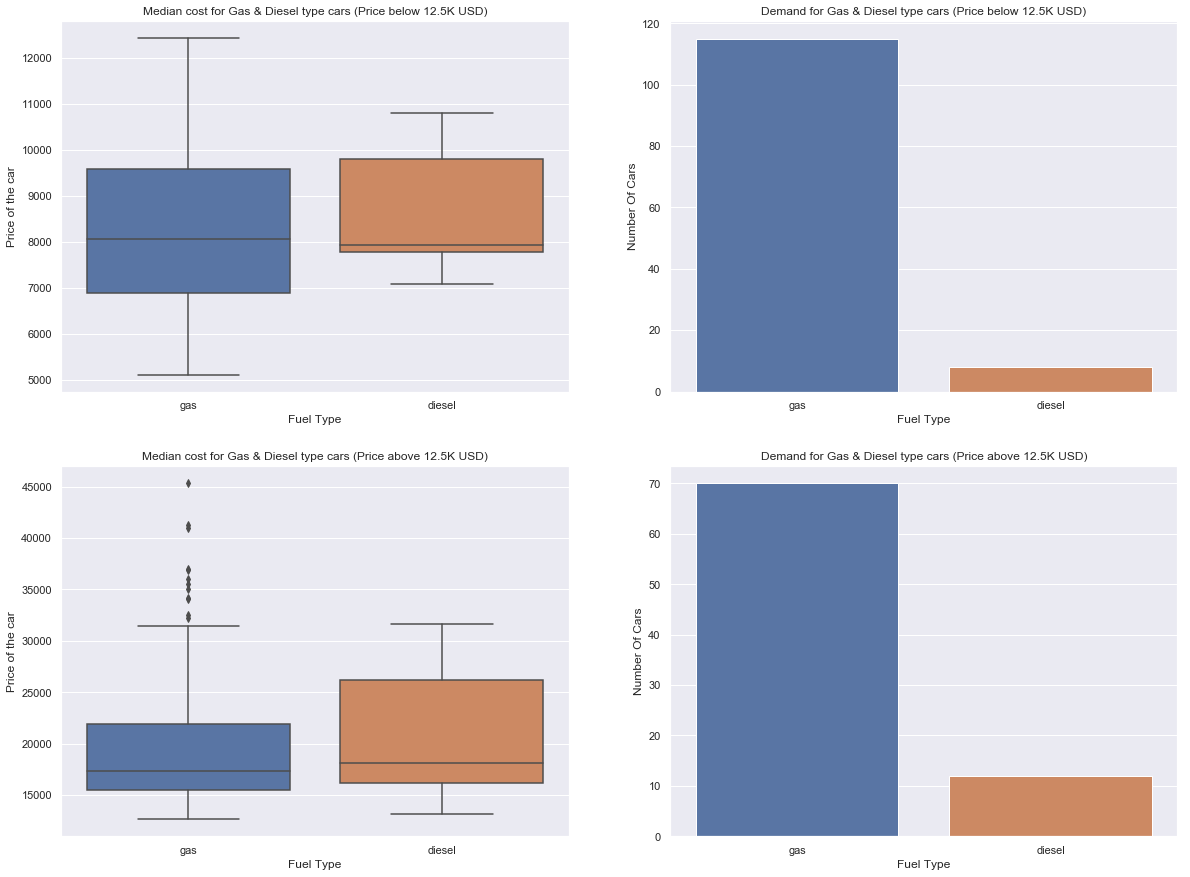

In [207]:
# Plots for Fuel Type

plt.figure(figsize=(20, 15))

#plot for cars below 12.5K USD
plt.subplot(221)
plt.title('Median cost for Gas & Diesel type cars (Price below 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'price', data = carprice_lt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Gas & Diesel type cars (Price below 12.5K USD)')
df = carprice_lt125_usd['fueltype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

#plot for cars above 12.5K USD
plt.subplot(223)
plt.title('Median cost for Gas & Diesel type cars (Price above 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'price', data = carprice_gt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Gas & Diesel type cars (Price above 12.5K USD)')
df = carprice_gt125_usd['fueltype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Fuel Type", ylabel="Number Of Cars")

plt.show()

### Analysis for Fuel Type variable

Here we can see that the median price of the cars of Gas & Diesel fuel is very similar, but the demand of diesel cars is less in both types of cars.

**Hence it does not seem to have a substancial relationship with the price of the car. And therefore there should be some other variable which describes the relationship with price better than Fuel Type variable.**

<font color="blue">Other variable relating to Fuel type that may have a significant relationship with price may be **City & Highway mileage** of the Gas and Diesel cars</font>

Will plot the **City & Highway mileage** of Gas and Diesel cars next.

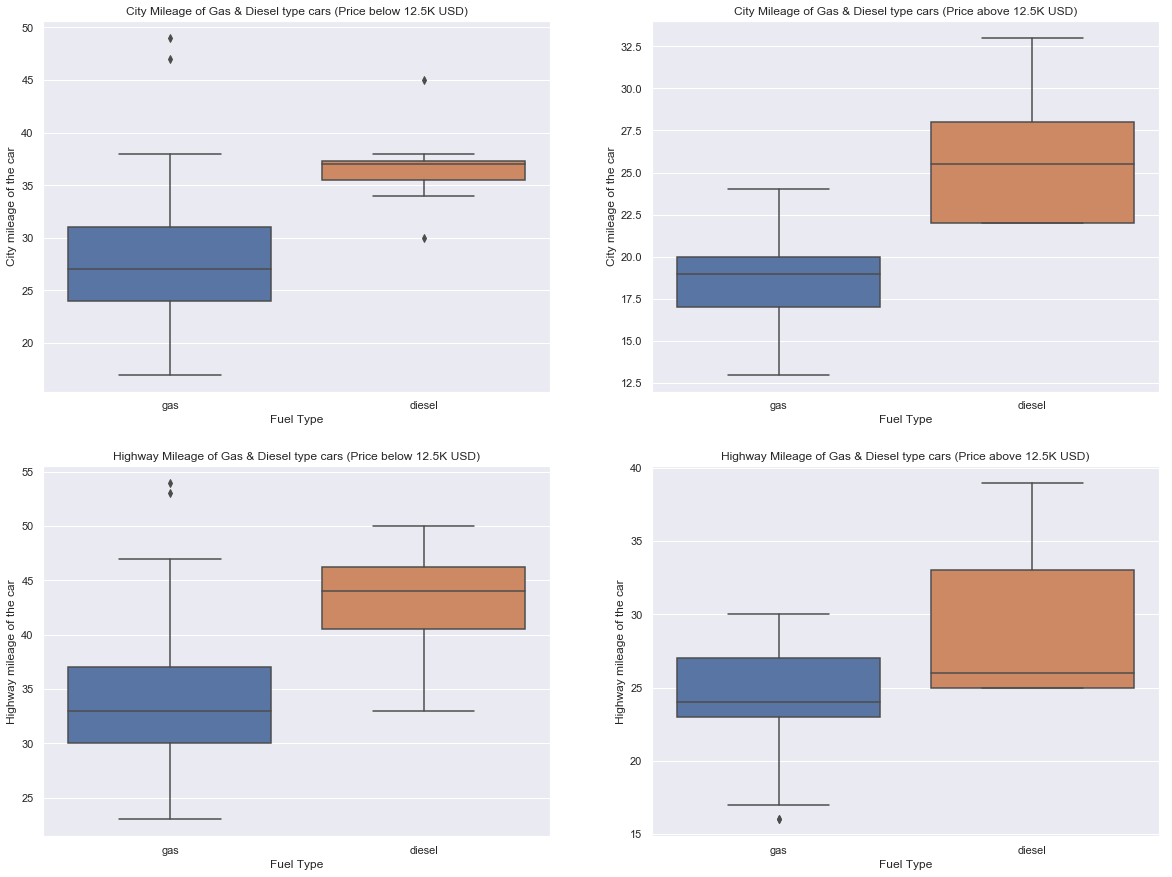

In [199]:
plt.figure(figsize=(20, 15))

# City Mileage
plt.subplot(221)
plt.title('City Mileage of Gas & Diesel type cars (Price below 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'citympg', data = carprice_lt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="City mileage of the car")
plt.subplot(222)
plt.title('City Mileage of Gas & Diesel type cars (Price above 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'citympg', data = carprice_gt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="City mileage of the car")

# Highway Mileage
plt.subplot(223)
plt.title('Highway Mileage of Gas & Diesel type cars (Price below 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'highwaympg', data = carprice_lt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Highway mileage of the car")
plt.subplot(224)
plt.title('Highway Mileage of Gas & Diesel type cars (Price above 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'highwaympg', data = carprice_gt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Highway mileage of the car")

plt.show()

### Analysis for Fuel Type variable with City and Highway mileage

Here we can clearly see that the mileage of Diesel cars is much better than the Gas cars. Therefore City and Highway mileage does not explain the higher demand of Gas cars. 

**Hence it does not seem to have a substancial relationship with the price of the car. And therefore there should be some other variable which describes the relationship with price better than City & Highway mileage variable.**

Other variable relating to Fuel type that may have a significant relationship with price may be **Horse Power** of the Gas and Diesel cars.

Will plot the **Horse Power** of Gas and Diesel cars next.

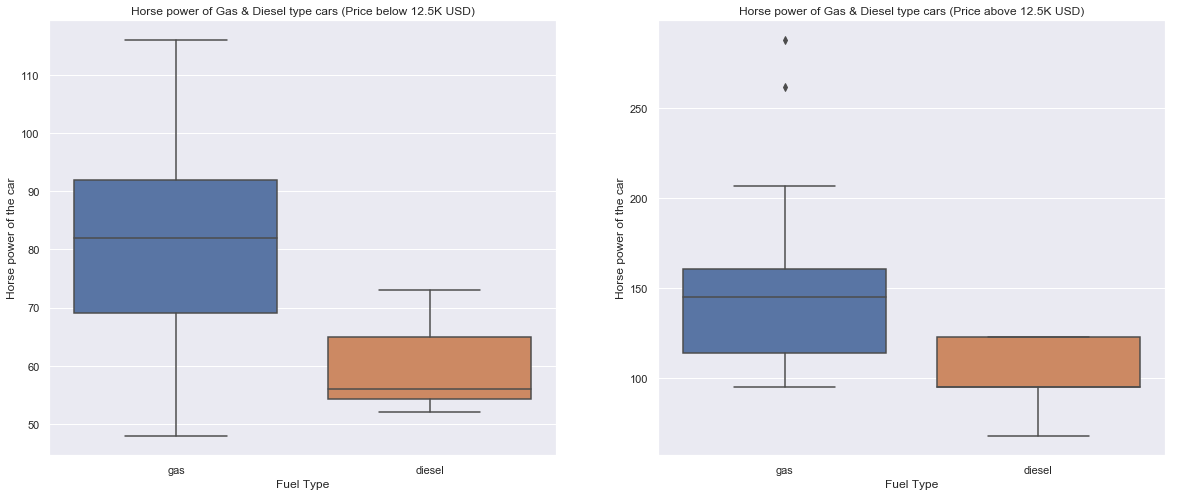

In [206]:
plt.figure(figsize=(20, 8))

# Horsepower
plt.subplot(121)
plt.title('Horse power of Gas & Diesel type cars (Price below 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'horsepower', data = carprice_lt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Horse power of the car")
plt.subplot(122)
plt.title('Horse power of Gas & Diesel type cars (Price above 12.5K USD)')
sns.boxplot(x = 'fueltype', y = 'horsepower', data = carprice_gt125_usd, order=['gas', 'diesel']).set(xlabel="Fuel Type", ylabel="Horse power of the car")

plt.show()

### Analysis for Fuel Type variable with Horse Power (HP)

Here we can clearly see that Gas cars provide a much higher HP than the Diesel cars in the cars costing below 12.5K USD.

For cars above 12.5K USD the difference in HP does not seem significant.
Therefore there should be some other variable which describes the relationship with price better than HP variable for cars above 12.5K USD.

# ---------------------------------------------------------------------------------------------------------------

## 3. Aspiration

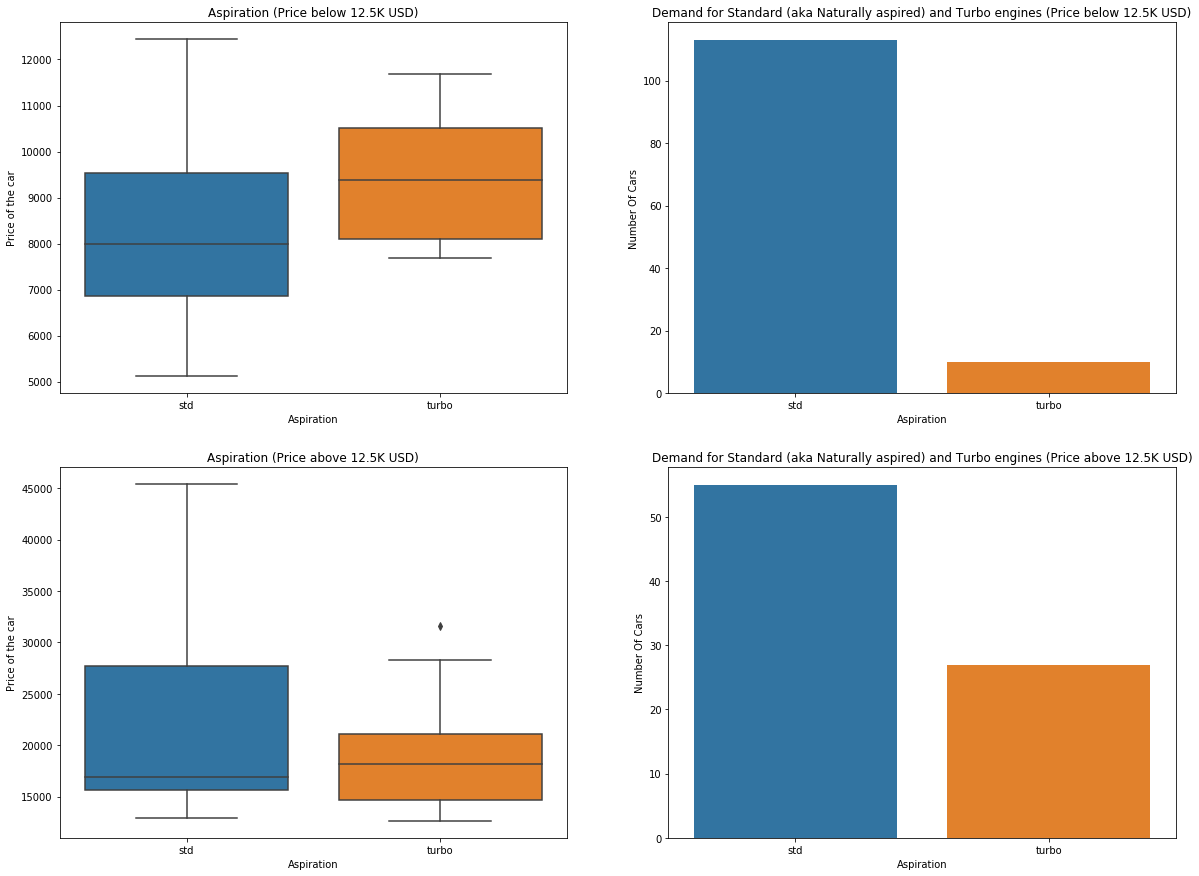

In [9]:
# Aspiration

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Aspiration (Price below 12.5K USD)')
sns.boxplot(x = 'aspiration', y = 'price', data = carprice_lt125_usd, order=['std', 'turbo']).set(xlabel="Aspiration", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Standard (aka Naturally aspired) and Turbo engines (Price below 12.5K USD)')
df = carprice_lt125_usd['aspiration'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Aspiration", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Aspiration (Price above 12.5K USD)')
sns.boxplot(x = 'aspiration', y = 'price', data = carprice_gt125_usd, order=['std', 'turbo']).set(xlabel="Aspiration", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Standard (aka Naturally aspired) and Turbo engines (Price above 12.5K USD)')
df = carprice_gt125_usd['aspiration'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Aspiration", ylabel="Number Of Cars")

plt.show()

### Analysis for Aspiration variable

Here we can see that for car models costing below 12.5K USD, having Turbo feature makes the car costlier than having Standard (aka Naturally aspired) feature.
Also, when we see the demand of such car models (in the bar plot), the buyers seems sensitive about this price change cause there is a huge difference between the demand of Standard and Turbo aspired feature.

Hence, for car models costing below 12.5K USD Aspiration feature **seems significant**.

But, for car models above 12.5K USD the difference in the price of Standard and Turbo models is almost same. But the demand for Turbo car models is at (approx.) 50% of Standard models. 

Hence for this category of car models Aspiration feature **does not seems significant**.
Therefore there should be some other variable which describes the relationship with price better than Aspiration variable for cars above 12.5K USD.

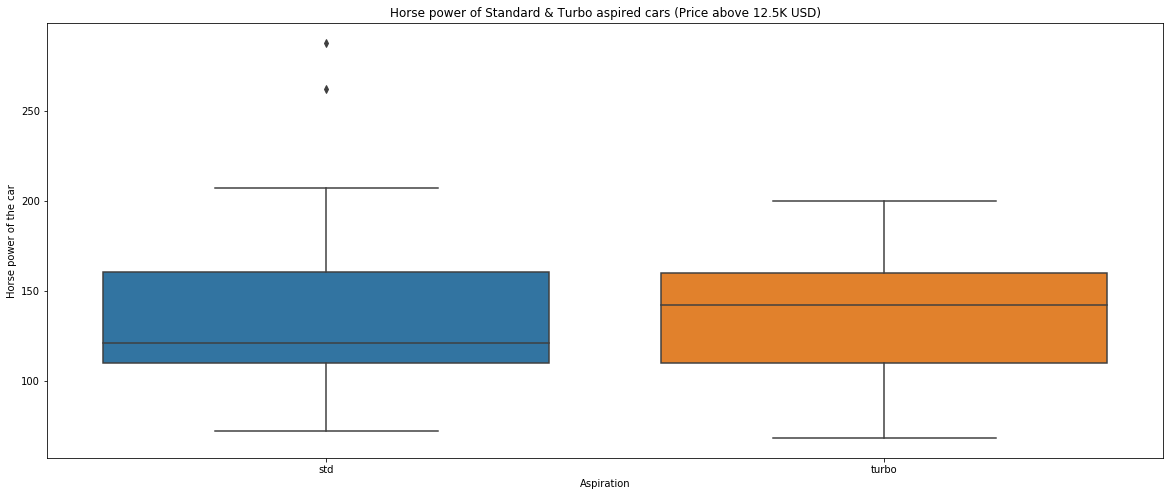

In [11]:
plt.figure(figsize=(20, 8))

# Horsepower
plt.subplot(111)
plt.title('Horse power of Standard & Turbo aspired cars (Price above 12.5K USD)')
sns.boxplot(x = 'aspiration', y = 'horsepower', data = carprice_gt125_usd, order=['std', 'turbo']).set(xlabel="Aspiration", ylabel="Horse power of the car")

plt.show()

### Analysis for Aspiration with Horse Power variable

Here we can see that the difference in Horse Power for Standard and Turbo model is not much for car costing above 12.5K USD, and hence it is not having a significant impact on the demand.

Hence, for car models costing above 12.5K USD **Aspiration** feature **does not seems significant**.

# ---------------------------------------------------------------------------------------------------------------

## 4. Number of Doors

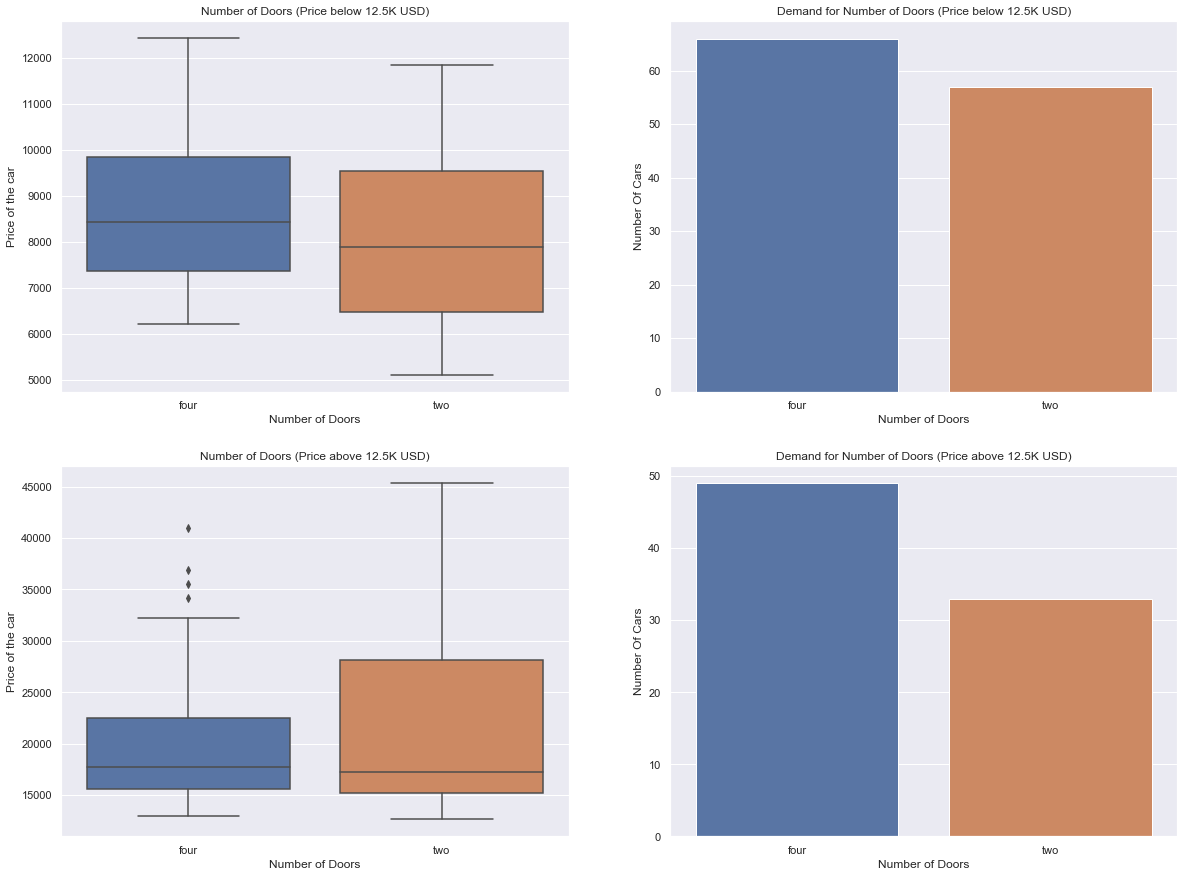

In [217]:
#Number of Doors

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Number of Doors (Price below 12.5K USD)')
sns.boxplot(x = 'doornumber', y = 'price', data = carprice_lt125_usd, order=['four', 'two']).set(xlabel="Number of Doors", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Number of Doors (Price below 12.5K USD)')
df = carprice_lt125_usd['doornumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Doors", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Number of Doors (Price above 12.5K USD)')
sns.boxplot(x = 'doornumber', y = 'price', data = carprice_gt125_usd, order=['four', 'two']).set(xlabel="Number of Doors", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Number of Doors (Price above 12.5K USD)')
df = carprice_gt125_usd['doornumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Doors", ylabel="Number Of Cars")

plt.show()

### Analysis for Number of Doors variable

Here we can see that the difference in the price of the car is not much for a two or a four door car.

Hence, Number of doors feature **does not seems significant** for predicting the price of the car.

## 5. Car Body (or Type of Car i.e. Sedan, Hatchback etc.)

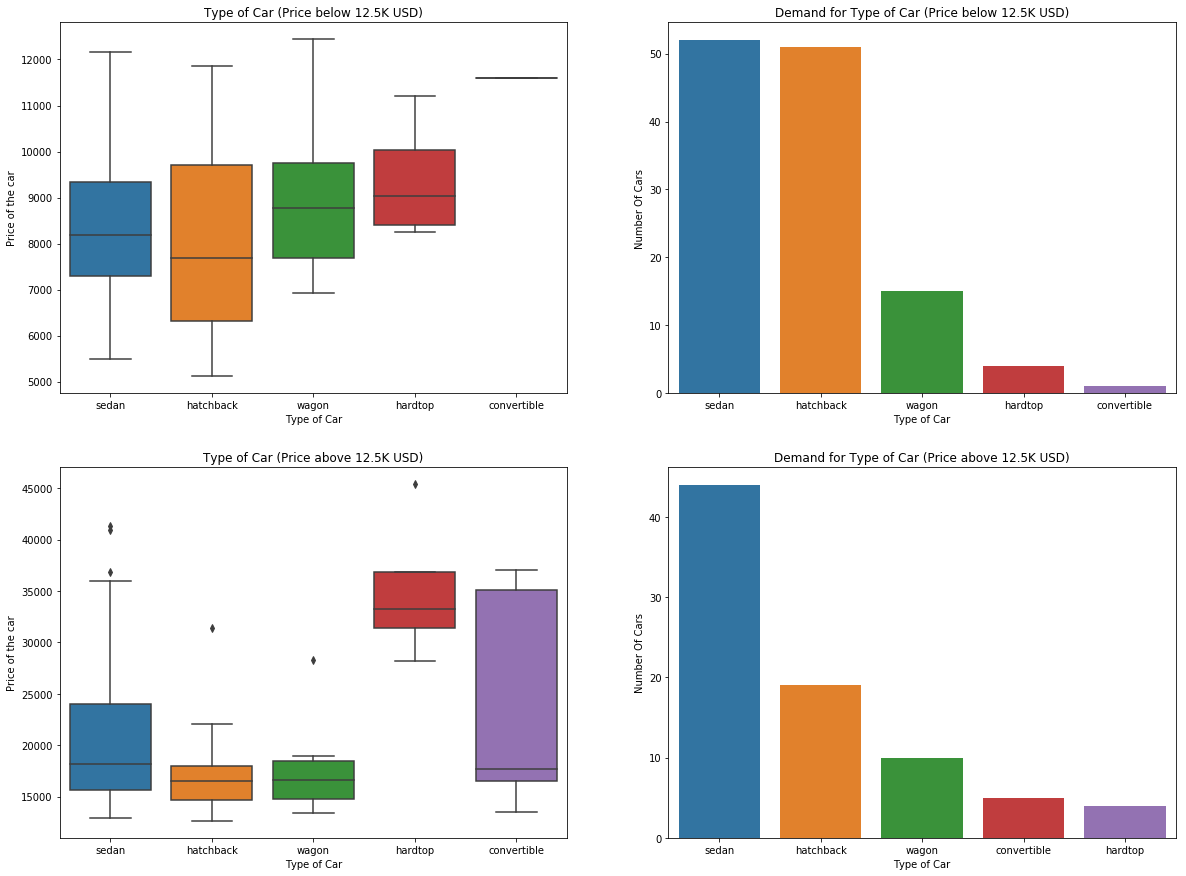

In [16]:
#Type of Car

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Type of Car (Price below 12.5K USD)')
sns.boxplot(x = 'carbody', y = 'price', data = carprice_lt125_usd, order=['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']).set(xlabel="Type of Car", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Type of Car (Price below 12.5K USD)')
df = carprice_lt125_usd['carbody'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Type of Car", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Type of Car (Price above 12.5K USD)')
sns.boxplot(x = 'carbody', y = 'price', data = carprice_gt125_usd, order=['sedan', 'hatchback', 'wagon', 'hardtop', 'convertible']).set(xlabel="Type of Car", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Type of Car (Price above 12.5K USD)')
df = carprice_gt125_usd['carbody'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Type of Car", ylabel="Number Of Cars")

plt.show()

### Analysis for Type of Car variable

Here we can see that there is very high demand for sedan, hatchback, and wagon cars for model priced above or below 12.5K USD.

Hence, **Type of car is a significant feature** impacting the price of the cars.

## 6. Drive Wheel Type (Forward, Rear, and 4 wheel drive.)

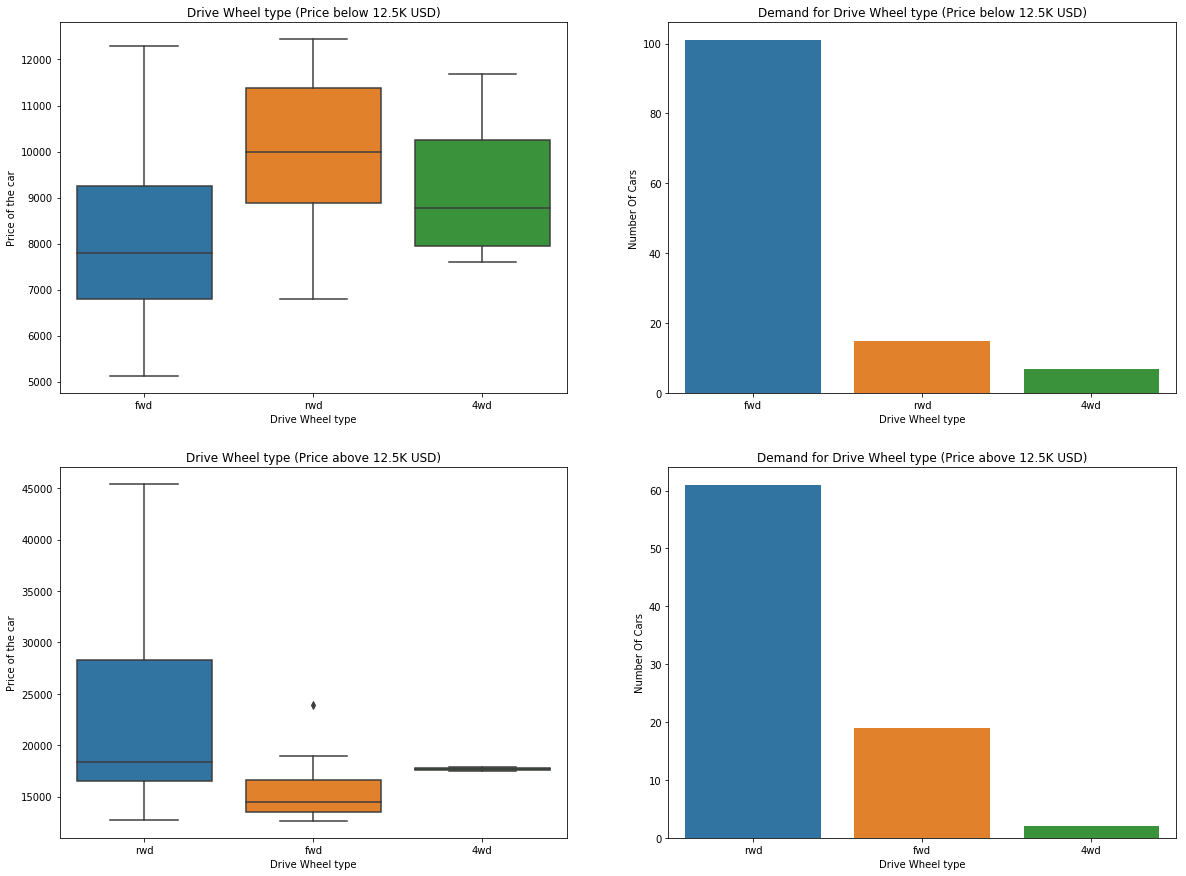

In [18]:
#Drive Wheel Type

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Drive Wheel type (Price below 12.5K USD)')
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice_lt125_usd, order=['fwd', 'rwd', '4wd']).set(xlabel="Drive Wheel type", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Drive Wheel type (Price below 12.5K USD)')
df = carprice_lt125_usd['drivewheel'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Drive Wheel type", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Drive Wheel type (Price above 12.5K USD)')
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice_gt125_usd, order=['rwd', 'fwd', '4wd']).set(xlabel="Drive Wheel type", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Drive Wheel type (Price above 12.5K USD)')
df = carprice_gt125_usd['drivewheel'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Drive Wheel type", ylabel="Number Of Cars")

plt.show()

### Analysis for Drive Wheel Type variable

Here we can see for car models below 12.5K USD the price of cars with Front wheel drive (FWD) is cheaper and hence it has a very high demand.

But for car models above 12.5K USD, people are preferring Rear wheel drive then Front wheel and 4 wheel drive even though its costlier.

Hence, **Forward wheel drive feature is a significant feature** impacting the price of the cars below 12.5K USD. 
And **Rear wheel drive feature is a significant feature** impacting the price of the cars above 12.5K USD. 


## 7. Engine Location (Forward, and Rear.)

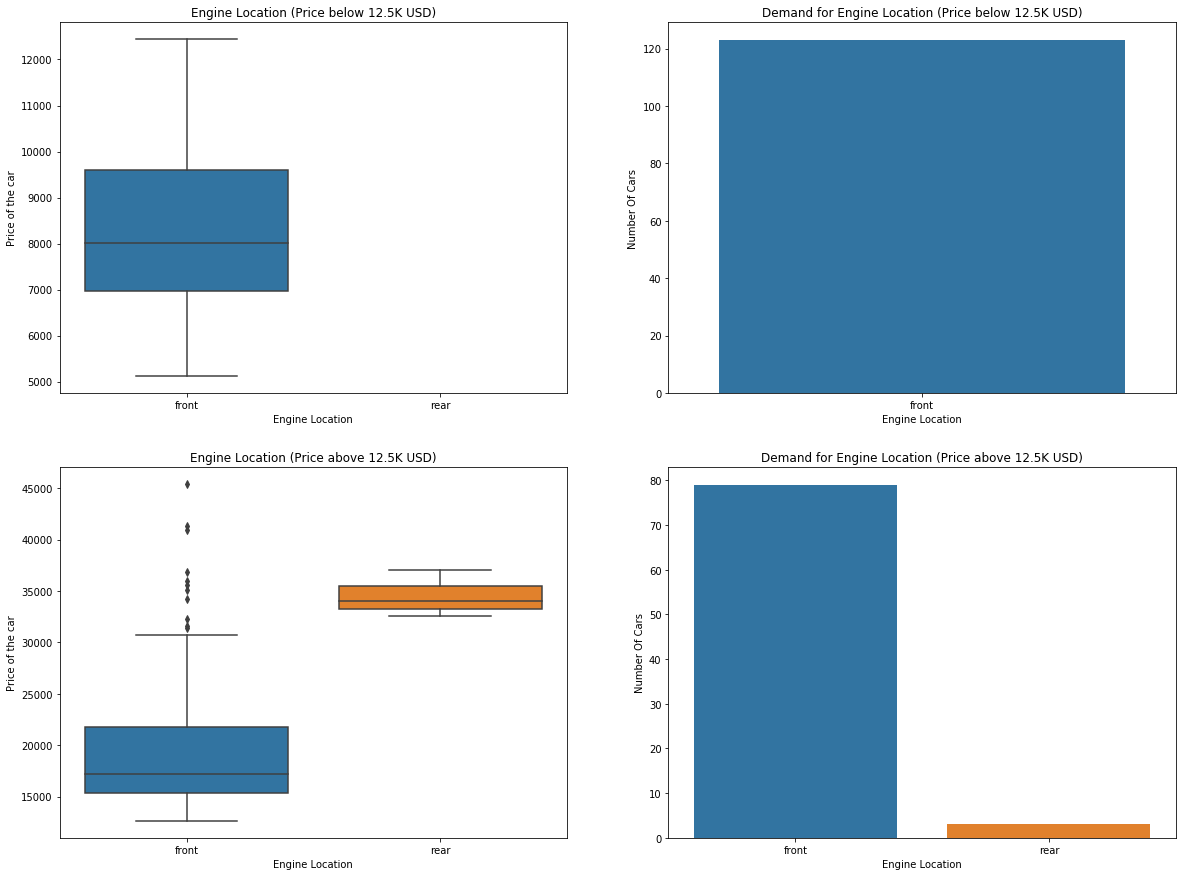

In [20]:
#Engine Location

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Engine Location (Price below 12.5K USD)')
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice_lt125_usd, order=['front', 'rear']).set(xlabel="Engine Location", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Engine Location (Price below 12.5K USD)')
df = carprice_lt125_usd['enginelocation'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Location", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Engine Location (Price above 12.5K USD)')
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice_gt125_usd, order=['front', 'rear']).set(xlabel="Engine Location", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Engine Location (Price above 12.5K USD)')
df = carprice_gt125_usd['enginelocation'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Location", ylabel="Number Of Cars")

plt.show()

### Analysis for Engine Location variable

Here we can clearly see that **Engine Location is a significant feature** impacting the price of the cars above and below 12.5K USD.

## 8. Engine Type

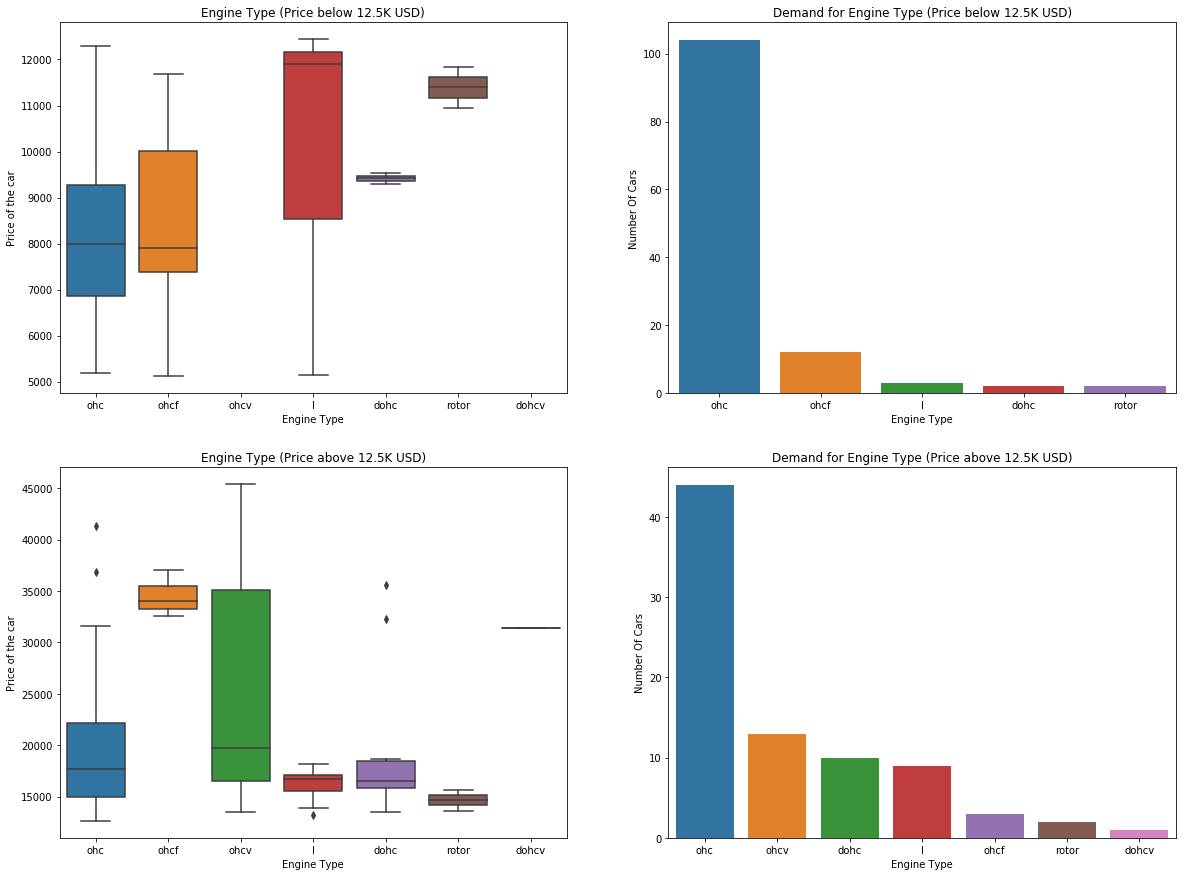

In [21]:
#Engine Type

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Engine Type (Price below 12.5K USD)')
sns.boxplot(x = 'enginetype', y = 'price', data = carprice_lt125_usd, order=['ohc', 'ohcf', 'ohcv', 'l', 'dohc', 'rotor', 'dohcv']).set(xlabel="Engine Type", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Engine Type (Price below 12.5K USD)')
df = carprice_lt125_usd['enginetype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Type", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Engine Type (Price above 12.5K USD)')
sns.boxplot(x = 'enginetype', y = 'price', data = carprice_gt125_usd, order=['ohc', 'ohcf', 'ohcv', 'l', 'dohc', 'rotor', 'dohcv']).set(xlabel="Engine Type", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Engine Type (Price above 12.5K USD)')
df = carprice_gt125_usd['enginetype'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Engine Type", ylabel="Number Of Cars")

plt.show()

### Analysis for Engine Type variable

Here we can clearly see that **"ohc" Type of Engine is a significant feature** impacting the price of the cars above and below 12.5K USD.

## 9. Number of cylinders

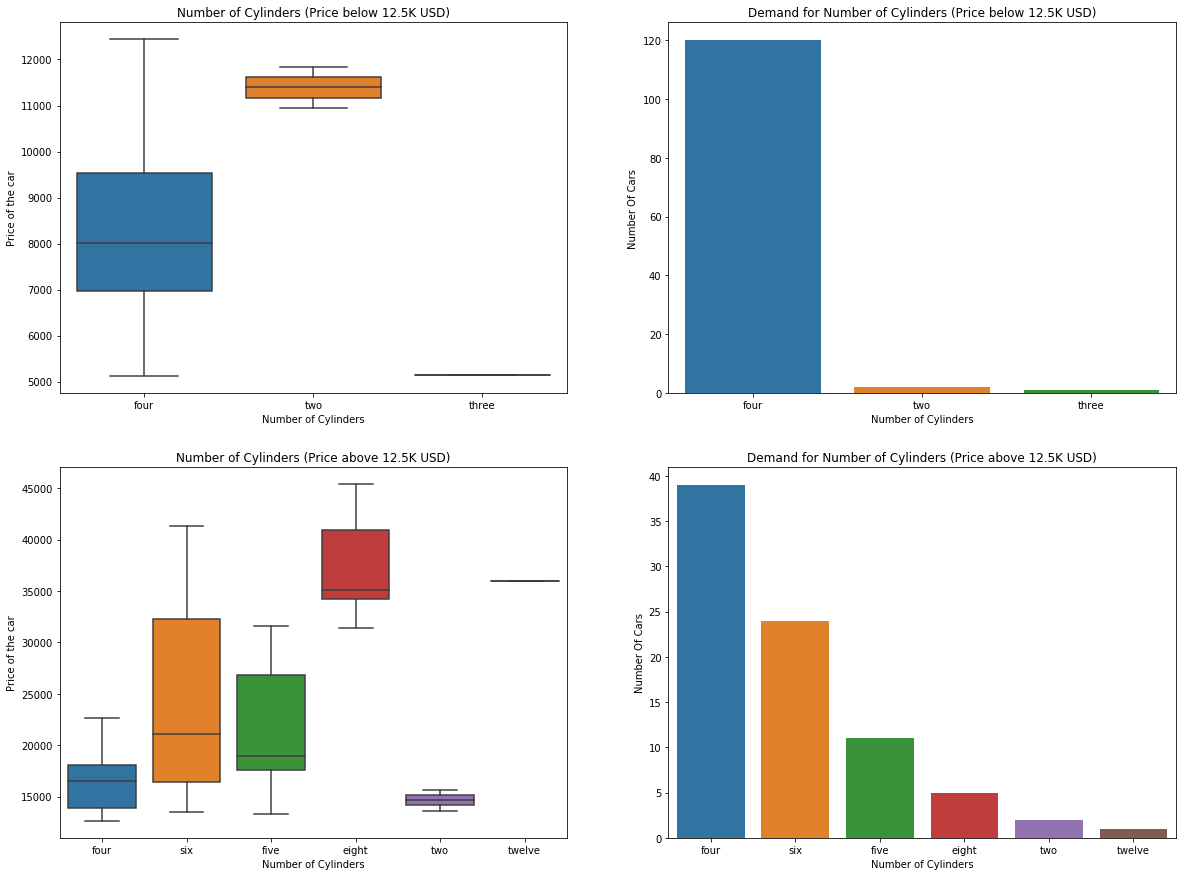

In [24]:
#Number of cylinders

plt.figure(figsize=(20, 15))

plt.subplot(221)
plt.title('Number of Cylinders (Price below 12.5K USD)')
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice_lt125_usd, order=['four', 'two', 'three']).set(xlabel="Number of Cylinders", ylabel="Price of the car")
plt.subplot(222)
plt.title('Demand for Number of Cylinders (Price below 12.5K USD)')
df = carprice_lt125_usd['cylindernumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Cylinders", ylabel="Number Of Cars")

plt.subplot(223)
plt.title('Number of Cylinders (Price above 12.5K USD)')
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice_gt125_usd, order=['four', 'six', 'five', 'eight', 'two', 'twelve']).set(xlabel="Number of Cylinders", ylabel="Price of the car")
plt.subplot(224)
plt.title('Demand for Number of Cylinders (Price above 12.5K USD)')
df = carprice_gt125_usd['cylindernumber'].value_counts()
sns.barplot(df.index, df.values).set(xlabel="Number of Cylinders", ylabel="Number Of Cars")

plt.show()

### Analysis for Number of Cylinder variable

Here we can clearly see that **Number of Cylinder is a significant feature** for predicting the price of the cars above and below 12.5K USD.

In [204]:
carprices_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
